<a href="https://colab.research.google.com/github/Jehmary/Machine-Learning-Basics/blob/main/PCT01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practical Coding Task 1
Consider this non-linear relation between two variables, $x$ and $y$.

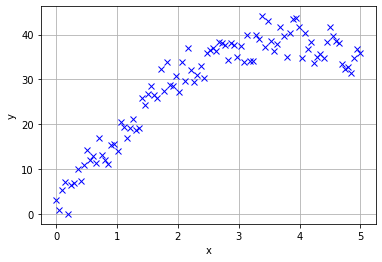

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

coeff = [-1,22,-3]

x = np.linspace(0,5,100)
y = addrandomfluctuations_nonlinear(x,coeff,10)
plt.plot(x,y,'bx')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

*Figure 1.1. A polynomial data set. The computer has no idea of the order of the polynomial.*

##1.1 Using the polyfit function

The [polyfit()](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function is Python's built-in function that solves for the coefficients of the given polynomial. The first two input parameters are the x and y data sets. The third input parameter is the order of the polynomial. The output $p$ are the solved coefficients, beginning with the coefficient of $x^0$. Compare $p$ with the given coefficients. Are they as expected?

[-2.7256992  20.36668554  0.67525645]


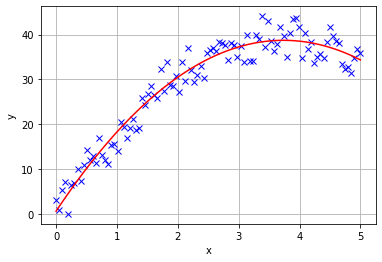

In [ ]:
p = np.polyfit(x,y,len(coeff)-1)
print(p)

# Hello, Sir. This used to be "ynlr = addrandomfluctuations_nonlinear(x,coeff,10)".
# But I think you were trying to do this.
ynlr = p[2] + p[1]*x + p[0]*x**2
plt.plot(x,y,'bx')
plt.plot(x,ynlr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

*Figure 1.2. Predicted best fit line using the nonlinear regression algorithm of Python.*

The given coefficients were -1, 22, -3. The solved coefficients are -2.7256992, 20.36668554, 0.67525645. The percentage errors are 172.57%, 7.42%, and 122.51%, respectively. While the first and third coefficients are way off, the second coefficient is close to the expected value.

###**Task 1. Solve for the mean square error between the actual result and best fit line. Display the result.**

In [ ]:
## Write your code here
se = 0
for i in range(0,len(y)):
  e = y[i]-ynlr[i]
  se += e**2
mse = se/len(y)
print(mse)

7.291156885393457


##1.2 How a computer determines the best fit line

I've already arranged almost everything for you to try out. The specific instructions are in Task 4. What you need to change are the:<br>
1. The [activation function](https://www.tensorflow.org/api_docs/python/tf/keras/activations) in the first *tf.keras.layers.Dense* layer
2. The learning rate of the Adam optimizer
3. The number of epochs<br>

At this time, you don't need to fully understand the [activation function](https://www.tensorflow.org/api_docs/python/tf/keras/activations). You're welcome to read about what these various activations do, but you'll also learn about them as well as the various [model optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) in a couple of weeks. Just try out the various activation functions and see which one works.<br>
This short code is a machine learning model that will solve for the best fit line of the given data $x$ and $y$. 

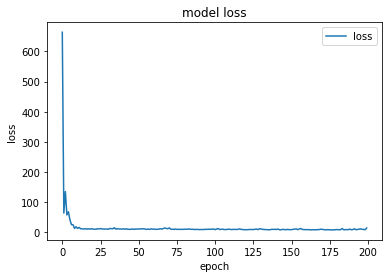

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='tanh', input_shape=[1], input_dim=5),
    tf.keras.layers.Dense(1, activation='linear')
    ])
model.compile(optimizer = Adam(learning_rate=0.06), loss = 'mean_squared_error')
history = model.fit(x,y, epochs = 200, verbose = 0)
plt.plot(history.history["loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["loss"],loc="upper right")
plt.show()

Figure 1.3. Training progress of the model.

###**Task 2. Plot and compare the actual data set with the predicted data values.**

4/4 [==============================] - 0s 3ms/step


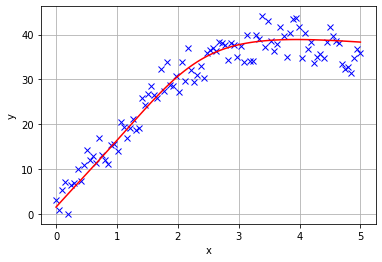

In [ ]:
ypred = model.predict([x])

## Write your code here
plt.plot(x,y,'bx')
plt.plot(x,ypred,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

###**Task 3. Solve for the mean square error between the actual result and best fit line. Display the result.**



In [ ]:
## Write your code here
se_mach = 0
for j in range(0,len(y)):
  e_mach = y[j]-ypred[j]
  se_mach += e_mach**2
mse_mach = se_mach/len(y)
print(mse_mach)

[8.421623]


###**Task 4. Find out which activation function gives the best best-fit line to the data set by changing the value of the activation function in the first dense layer. Then determine the best learning_rate.**
It may not be necessary to change the number of epochs, but you may change them if you like just to see what happens.

With a learning rate = 0.001, the activation functions yielded:
*   relu = 37.911037
*   elu = 27.76264
*   exponential = 47.664886
*   gelu = 34.348026
*   hard_sigmoid = 57.47097
*   linear = 35.968765
*   selu = 26.24459
*   sigmoid = 62.364838
*   softmax = 841.86414
*   softplus = 42.06538
*   softsign = 22.444103
*   swish = 34.2507
*   tanh = 15.173115

Choosing Hyperbolic tangent (tanh) since it yielded the least error, the different learning rates yielded:
*   learning rate = 0.005 > 9.733686
*   learning rate = 0.01 > 9.326386
*   learning rate = 0.02 > 9.086541
*   learning rate = 0.03 > 9.047661
*   learning rate = 0.04 > 8.071377
*   learning rate = 0.05 > 7.6936297
*   learning rate = 0.06 > 8.421623

The Hyperbolic tangent activation function gives the best best-fit line to the data set. The best learning rate is around 0.05.



###**Task 5 (Optional). You may play around with this program by changing the coefficients and the fluctuation size to see what happens. Which training function will give you the least MSE?**
You can also change the number of layers, if you like to play around with that. Just copy the first dense layer and paste it as a second or third or fourth layer. Remove the *input_shape* and *input_dim* options after you paste the new command lines. Don't forget to put a comma at the end of each line.

#Functions to be used

In [ ]:
def addrandomfluctuations_nonlinear(x,coeff,fluctuationsize):
  import random

  sum = 0
  for j in range(len(coeff)):
    sum += coeff[j]*np.power(x,j)

  yrand = np.zeros(len(x))
  for i in range(len(x)):
    yrand[i] = sum[i] + fluctuationsize*(random.random()-0.5)
  
  return yrand